In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

import sys
import os

import datetime
import matplotlib.pyplot as plt
import numpy as np
import numba
import pandas as pd
import pprint

from IPython.display import clear_output
from IPython.display import display

#from pax_utils import utils_event
#from pax_utils import file_utils
#from pax_utils import interaction_utils
#from pax_utils import numeric_utils
#from pax_utils import s1s2_utils
#from pax_utils import waveform_pax_utils
#from pax_utils import waveform_utils

#from pax.configuration import load_configuration


In [56]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

f_merge        = 'temp_s2/strArr_dir3.npy'
strArr         = np.load(f_merge)
arr_sum_wf     = np.sum(strArr[:]['image'], axis=1)
arr_s2_areas   = strArr[:]['s2_areas']
arr_width_s2   = strArr[:]['right']- strArr[:]['left']
arr_width_true = strArr[:]['true_right']- strArr[:]['true_left']

x_true = strArr[:]['true_x']
x_reco = strArr[:]['x']
y_true = strArr[:]['true_y']
y_reco = strArr[:]['y']

print(arr_s2_areas.shape)
print(arr_sum_wf.shape)
print()
print(arr_width_true[0])
print(arr_width_s2[0])



(1000, 127)
(1000, 1000)

531
608



Error! Sum of Waveform NOT Equal to Sum of Areas!



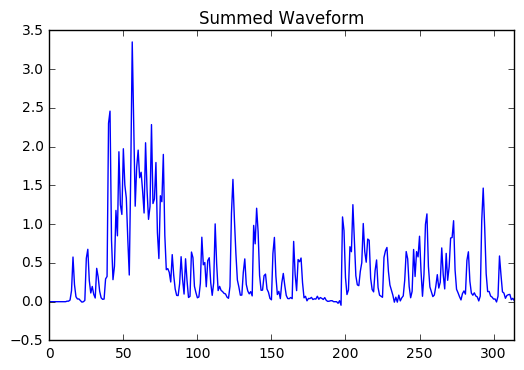

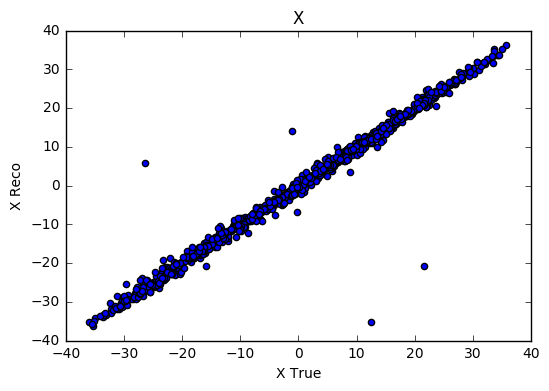

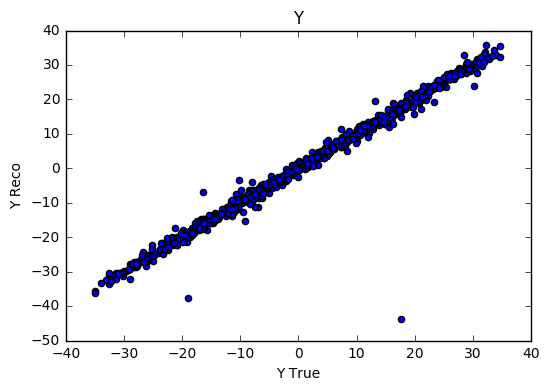

In [59]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

sum_wf    = np.sum(arr_sum_wf[idx])
sum_areas = np.sum(arr_width_s2[idx])
eq        = np.isclose(sum_wf, sum_areas)

if not (eq):
    print("\nError! Sum of Waveform NOT Equal to Sum of Areas!\n")
    
idx = 2

plt.figure()
plt.plot(arr_sum_wf[idx])
plt.xlim([0, arr_width_s2[idx]])
plt.title("Summed Waveform")

plt.figure()
plt.scatter(x_true, x_reco)
plt.xlabel("X True")
plt.ylabel("X Reco")
plt.title("X")

plt.figure()
plt.scatter(y_true, y_reco)
plt.xlabel("Y True")
plt.ylabel("Y Reco")
plt.title("Y")


In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

f = plt.figure(figsize=(30, 15))

#def processPklEvents(zipfilename):
#
#    #--------------------------------------------------------------------------
#    #--------------------------------------------------------------------------
#
#    lst_pkl_files  = file_utils.getListOfPklFilesFromZipFile(zipfilename, nEventsPerFile)
#    df_zip_merged = pd.DataFrame()
#    
#    intr0  = None
#    sum_wf = None
#    event  = None
#    
#      
#    #--------------------------------------------------------------------------
#    #--------------------------------------------------------------------------
#    
#    for iPklFile in range(0, len(lst_pkl_files)):
#    
#        #----------------------------------------------------------------------
#        #----------------------------------------------------------------------
#    
#        print("File: '" + str(zipfilename) + "'")
#        print("   event_number: " + str(iPklFile))
#        #clear_output(wait=True)
#
#        jsonfilename = os.path.dirname(zipfilename) + '/pax_info.json'
#        print("   CFG: '" + str(jsonfilename) + "'")
#        
#        cfg           = event_utils.getConfig(jsonfilename)
#        pklfilename   = lst_pkl_files[iPklFile]
#        event         = file_utils.getPaxEventFromPklFileInZipArchive(zipfilename, pklfilename)
#        interactions  = event.interactions
#        nInteractions = len(interactions)
#        
#        if (nInteractions != 1):
#            
#            continue
#
#        intr0 = None
#        
#        if (len(interactions) > 0):
#            
#            intr0 = interactions[0]
#        
#        df_pkl_event  = event_utils.getEventDataFrameFromEvent(event)
#        df_pkl_intr   = interaction_utils.getInteractionDataFrameFromEvent(event)
#        df_pkl_s2s    = s1s2_utils.getS2integralsDataFrame(event, 127)
#        df_pkl_merged = df_pkl_event.merge(df_pkl_intr).merge(df_pkl_s2s)
#        df_zip_merged = df_zip_merged.append(df_pkl_merged)
#        
#
#        #----------------------------------------------------------------------
#        # S2 Window from Event
#        #----------------------------------------------------------------------
#        
#        left  = event.main_s2.left
#        right = event.main_s2.right
#        
#            
#        #----------------------------------------------------------------------
#        # Raw Waveforms
#        #----------------------------------------------------------------------
#    
#        arr_summed_waveform_raw_evt = waveform_pax_utils.getSummedWaveformFromEvent(event, 'tpc_raw')[left:right]
#        df_channels_waveforms_raw   = waveform_utils.getChannelsWaveformsDataFrame(event, cfg, 'tpc', True)
#        arr_summed_waveform_raw_df  = waveform_utils.getSummedWaveformFromDataFrame(df_channels_waveforms_raw, event)[left:right]
#        
#        f = plt.figure(figsize=(10, 5))
#        plt.plot(arr_summed_waveform_raw_evt, color='b', label='Raw Summed Waveform from Event') 
#        plt.plot(arr_summed_waveform_raw_df , color='r', label='Raw Summed Waveform by Hand DF') 
#        plt.legend(fontsize=18)
#        
#        eq_raw = numeric_utils.compareArrays(arr_summed_waveform_raw_evt, arr_summed_waveform_raw_df)
#                                                                                      
#            
#        #----------------------------------------------------------------------
#        # TPC Summed Waveform
#        #----------------------------------------------------------------------
#        
#        arr_summed_waveform_tpc_evt = waveform_pax_utils.getSummedWaveformFromEvent(event, 'tpc')[left:right]
#        df_channels_waveforms_tpc   = waveform_utils.getChannelsWaveformsDataFrame(event, cfg, 'tpc', False)
#        arr_summed_waveform_tpc_df  = waveform_utils.getSummedWaveformFromDataFrame(df_channels_waveforms_tpc, event)[left:right]
#        
#        f = plt.figure(figsize=(10, 5))
#        plt.plot(arr_summed_waveform_tpc_evt, color='b', label='TPC Summed Waveform from Event') 
#        plt.plot(arr_summed_waveform_tpc_df , color='r', label='TPC Summed Waveform by Hand DF') 
#        plt.legend(fontsize=18)
#        
#        eq_tpc = numeric_utils.compareArrays(arr_summed_waveform_tpc_evt, arr_summed_waveform_tpc_df)
#                                                                                      
#           
#        #----------------------------------------------------------------------
#        # Top Summed Waveform
#        #----------------------------------------------------------------------
#        
#        arr_summed_waveform_top_evt = waveform_pax_utils.getSummedWaveformFromEvent(event, 'tpc_top')[left:right]
#        df_channels_waveforms_top   = waveform_utils.getChannelsWaveformsDataFrame(event, cfg, 'top', False)
#        arr_summed_waveform_top_df  = waveform_utils.getSummedWaveformFromDataFrame(df_channels_waveforms_top, event)[left:right]
#        
#        f = plt.figure(figsize=(10, 5))
#        plt.plot(arr_summed_waveform_top_evt, color='b', label='TOP Summed Waveform from Event') 
#        plt.plot(arr_summed_waveform_top_df , color='r', label='TOP Summed Waveform by Hand DF') 
#        plt.legend(fontsize=18)
#        
#        eq_top = numeric_utils.compareArrays(arr_summed_waveform_top_evt, arr_summed_waveform_top_df)
#    
#        display(df_channels_waveforms_top[0:5][:])
#        
#                    
#        #----------------------------------------------------------------------
#        # Sanity
#        #----------------------------------------------------------------------
#
#        assert(eq_raw)
#        assert(eq_tpc)
#        assert(eq_top)
#        assert(18 == len(event.get_sum_waveform_names()))
#        
#
#        #----------------------------------------------------------------------
#        #----------------------------------------------------------------------
#
#        continue
#            
#
#
#    #--------------------------------------------------------------------------
#    #--------------------------------------------------------------------------
#    
#    #plt.legend()
#    
#    df_zip_merged.reset_index(inplace=True, drop=True)
#       
#    return df_zip_merged, event, intr0, sum_wf

    
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------


NameError: name 'plt' is not defined

File: '../pax_run/pax_output/Mar25/instructions_000000/XENON1T-0-000000000-000000999-000001000.zip'
   event_number: 0
   CFG: '../pax_run/pax_output/Mar25/instructions_000000/pax_info.json'
File: '../pax_run/pax_output/Mar25/instructions_000000/XENON1T-0-000000000-000000999-000001000.zip'
   event_number: 1
   CFG: '../pax_run/pax_output/Mar25/instructions_000000/pax_info.json'



,channel,left,right,length,sum,raw_data
0,0,105426,105791,366,1.715228,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,4,105426,105888,463,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,5,105426,105888,463,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,9,105426,105501,76,1.293108,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,10,105580,105681,102,1.385255,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


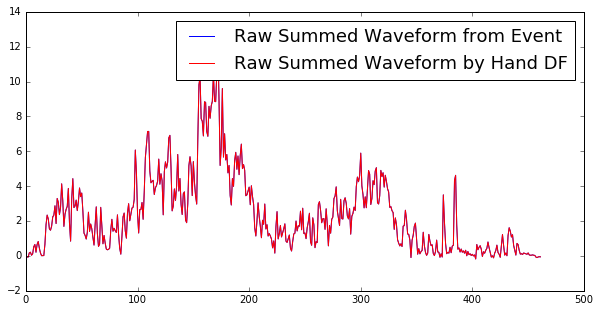

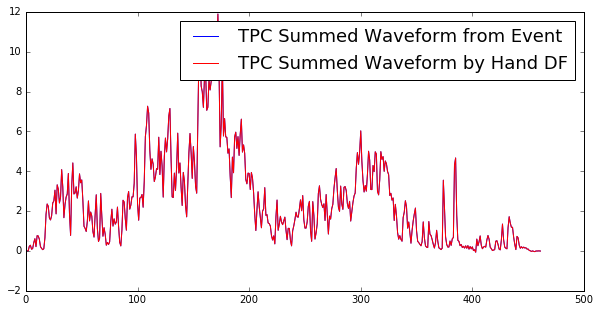

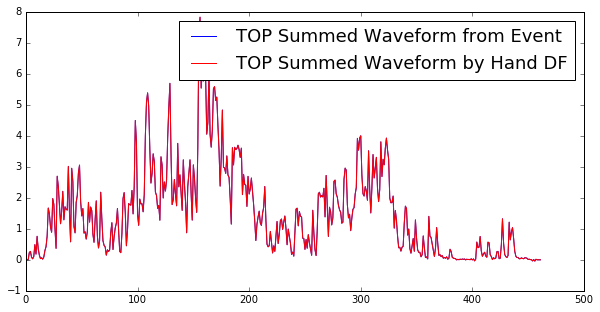

In [3]:


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

#zipfilename    = '../pax_run/pax_output/Mar25/instructions_000000/XENON1T-0-000000000-000000999-000001000.zip'
#nEventsPerFile = 2
#df_zip_merged, event, intr, wf_sum = processPklEvents(zipfilename)


    